In [337]:
# Imports
import matplotlib.pyplot as plt
plt.style.use('plot_style.mplstyle')
import yaml
import numpy as np
import pingouin as pg
import pandas as pd

# Custom functions
from functions.dataloaders import load_data
from functions.signal_processing import binarize_ca_traces

# Params
with open('params.yaml','r') as file:
    params = yaml.full_load(file)

# Plot footprints and calcium traces with associated colors

In [2]:
# Pick example session/mouse
session_path='../../datasets/calcium_imaging/M990/M990_legoOF_20190114'
data = load_data(session_path)

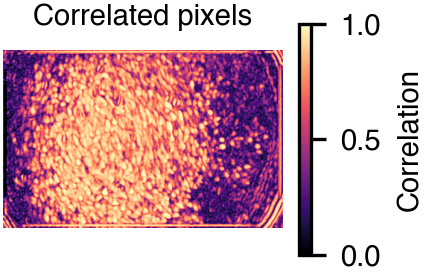

In [8]:
# Correlated pixels
plt.imshow(data['corrProj'].T, cmap='magma', vmin=0, vmax=1)
plt.axis('off')
plt.title('Correlated pixels')
plt.colorbar(label='Correlation')
plt.savefig("results/figures/fig1/corrProj.pdf")

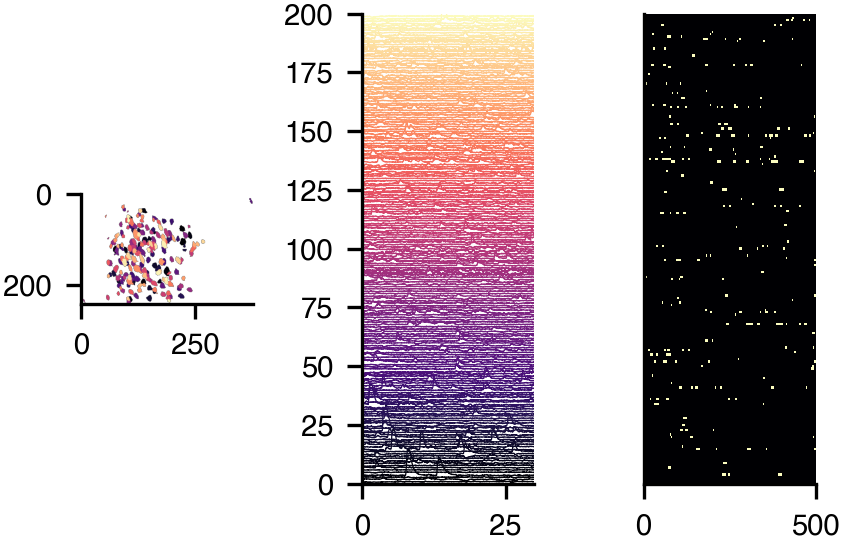

In [350]:
# Plot SFPs with color
import matplotlib
#cmap = matplotlib.cm.get_cmap('nipy_spectral')
cmap = matplotlib.cm.get_cmap('magma')
#numNeurons=data['SFPs'].shape[0]
numNeurons=200
threshold=.2

colorSFPs = np.zeros((data['SFPs'].shape[1],data['SFPs'].shape[2],4))
SFPs = data['SFPs']/np.max(data['SFPs'])
for cell_i in range(numNeurons):
    color = cmap(cell_i/numNeurons)
    colorSFPs[SFPs[cell_i]>threshold] = color #data['SFPs'][cell_i]/np.max(data['SFPs'][cell_i])
    #colorSFPs[SFPs[cell_i]>threshold,3] = np.sqrt((SFPs[cell_i][SFPs[cell_i]>threshold])/np.max(SFPs[cell_i]))

plt.figure(figsize=(3,2))
plt.subplot(121)
plt.imshow(colorSFPs.transpose(1,0,2))
plt.axis('image')

plt.subplot(122)
for i in range(numNeurons):
    color = cmap(i/(numNeurons))
    plt.plot(data['caTime'],data['caTrace'][:,i]*2+i,
            c=color,
            linewidth=.3)
plt.xlim(0,30)
plt.ylim(0,numNeurons)

# plt.subplot(133)
# binarized_traces = binarize_ca_traces(data['caTrace'],params['z_threshold'], params['sampling_frequency'])
# plt.imshow(binarized_traces.T,interpolation='none', aspect='auto', cmap='magma')
# plt.xlim(0,500)
# plt.yticks([])
# plt.ylim(0,numNeurons)

plt.tight_layout()


In [82]:
(data['SFPs'][cell_i]>0)/np.max(data['SFPs'][cell_i])*cell_i

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])